# Nishkarsh Gupta

# Task 5:- " Perform ‘Exploratory Data Analysis’ on dataset Indian Premier League’"
* Problem Statement-As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.

### Lets look at the data of a Indian Premier League and get some insights from it.

### IMPORTING LIBRARIES

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## READING THE DATA


### Lets us read the data and take a look at first few rows.

In [159]:
match_data=pd.read_csv('C:/Users/Nishkarsh/Desktop/matches.csv')
delivery_data=pd.read_csv('C:/Users/Nishkarsh/Desktop/deliveries.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## EXPLORATORY DATA ANALYSIS

In [160]:
match_data.shape

(756, 18)

In [161]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [162]:
match_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [163]:
# Checking for the Biggest Team Win
biggest_win=match_data['win_by_runs'].max()
teams_biggest_win=[]

f=match_data.loc[match_data['win_by_runs']==biggest_win]

teams_biggest_win.append((str(f['season'].tolist()[0])))

teams_biggest_win.append((str(f['venue'].tolist()[0])))

teams_biggest_win.append(str(f['team1'].tolist()[0]))

teams_biggest_win.append(str(f['team2'].tolist()[0]))


teams_biggest_win.append(str(f['winner'].tolist()[0]))


In [116]:
pd.DataFrame(teams_biggest_win,index=['season','venue','team1','team2','winner'],columns=['Biggest win by Team '])

,Biggest win by Team
season,2017
venue,Feroz Shah Kotla
team1,Mumbai Indians
team2,Delhi Daredevils
winner,Mumbai Indians


In [120]:
# Checking for the tie matches of thier Venue and season
tie_matches_no=match_data.loc[match_data['result']=='tie']
tie_matches_no
f=match_data.loc[match_data['dl_applied']==1]
season_number=f['season'].value_counts()
dl_stadium=f['venue'].value_counts()

In [124]:
print(season_number)
print(dl_stadium)

2016    4
2011    3
2009    3
2018    3
2015    2
2008    2
2014    1
2017    1
Name: season, dtype: int64
Eden Gardens                                           4
M Chinnaswamy Stadium                                  3
Feroz Shah Kotla                                       3
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    2
Rajiv Gandhi International Stadium, Uppal              2
Sawai Mansingh Stadium                                 1
SuperSport Park                                        1
Nehru Stadium                                          1
Newlands                                               1
Kingsmead                                              1
Name: venue, dtype: int64


* Biggest win in terms of run margin was witnessed in Season of 2017 where Mumbai Indians won by 146 runs against Delhi Daredevils at Feroz Shah Kotla
* From 2008 to 2017 only 7 Matches have Tied in IPL.
* Since 2008 to 2017 only 16 Matches have been Decided on Duckworth Lewis Method and in 2016 highest matches were decided by this System that counted to 4.
* M Chinnaswamy Stadium and Eden Gardens are the Venues where highest macthes have been Decided on DL Method (3 each).

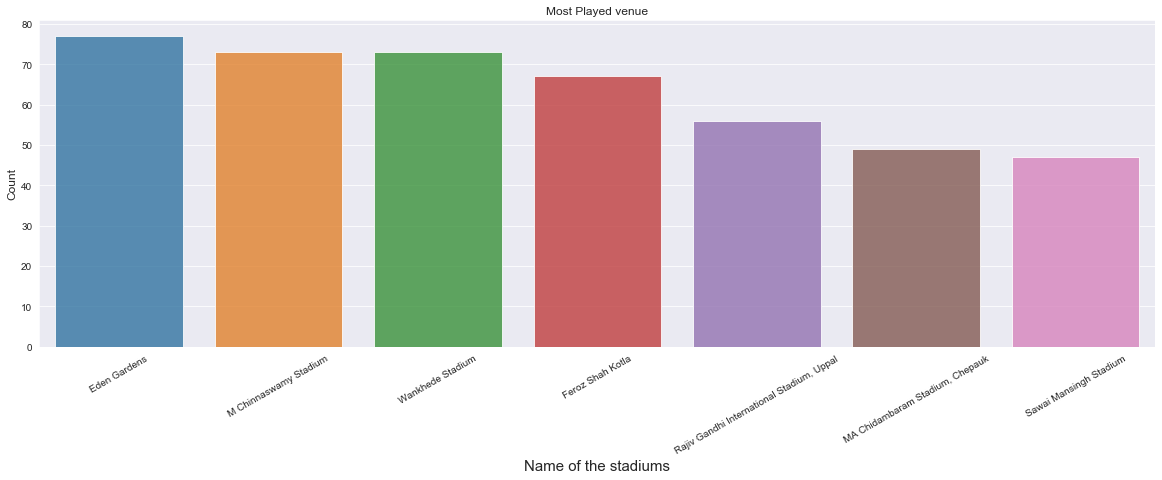

In [127]:
# 7 Most Played venue in the History of IPL from 2008 to 2019
sns.set_style("darkgrid")# to make background with grid
ls=match_data['venue'].value_counts().sort_values(ascending=False)
ls=ls[:7]
plt.figure(figsize=(20,6))
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()


* This shows M Chinnaswamy stadium has hosted most matches in the History of IPL

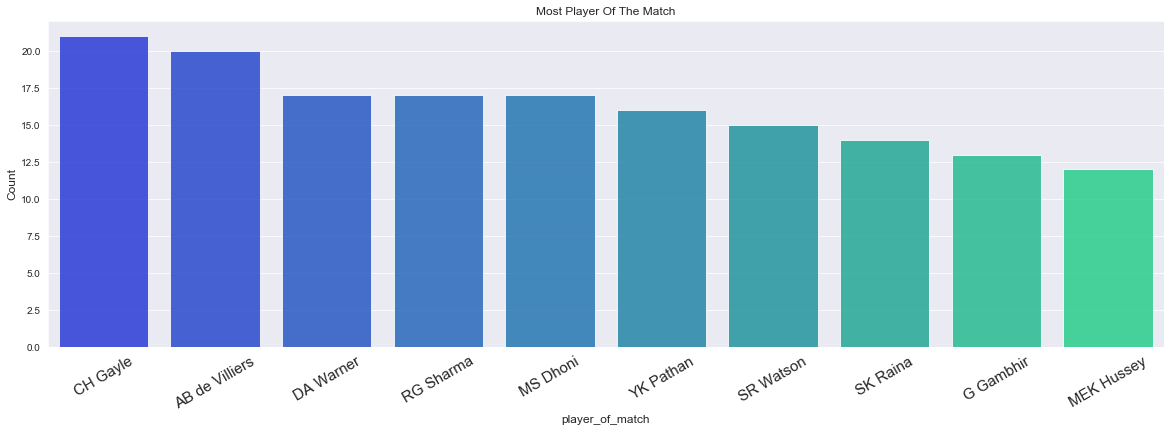

In [126]:
# Most Player of the Matches across 9 Seasons
man_of_match=match_data['player_of_match'].value_counts()
man_of_match=man_of_match[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
man_of_matches=sns.barplot(man_of_match.index, man_of_match.values, alpha=0.8,palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)
man_of_matches.set_xticklabels(rotation=30,labels=man_of_match.index,fontsize=15)
plt.show()

* Chris Gayle has recived most man of the matches from 2008 to 2019

Text(0.5, 0, 'Season')

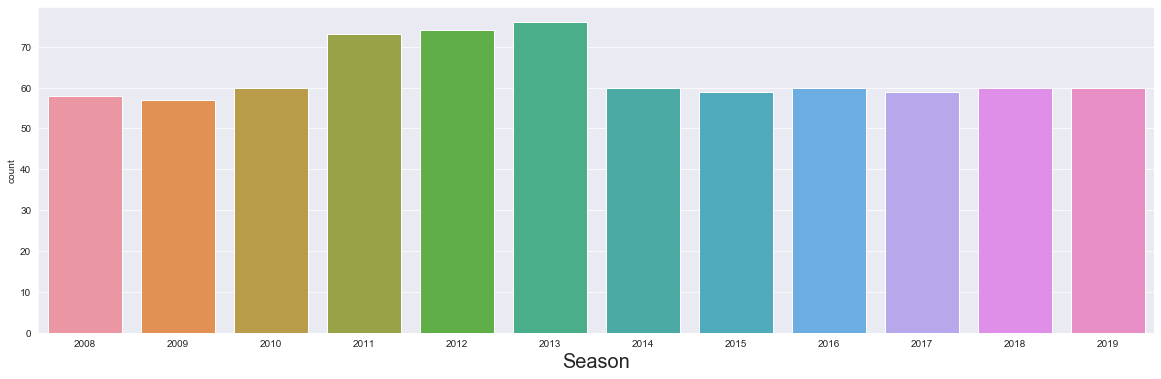

In [128]:
# Matches Played across each season
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=match_data)
plt.xlabel('Season',fontsize=20)

* This Shows Most Matches were played in the 2013 Season

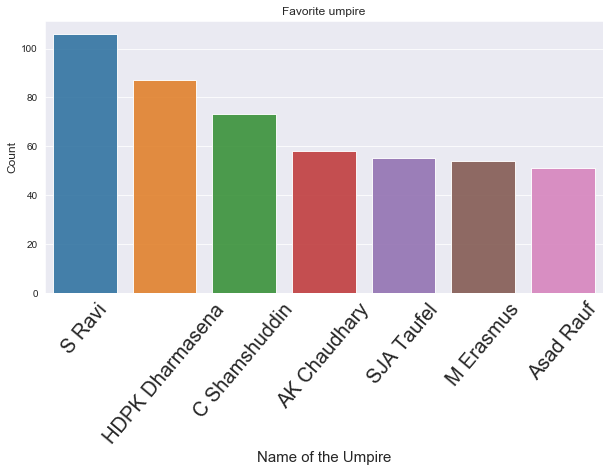

In [129]:
# Most Favourite Umpires
ump=pd.concat([match_data['umpire1'],match_data['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:7]
plt.figure(figsize=(10,5))
Most_umpired =sns.barplot(x=ump.index, y=ump.values, alpha=0.9)

plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=50,labels=ump.index,fontsize=20)
plt.show()

* This shows that Dharamsena and S Ravi were the favourite Umpires.

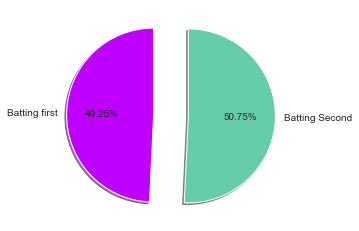

In [130]:
# Stadium Wise Analysis for Most Played 6 Venues
Delhi_stadium=match_data.loc[(match_data['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#bf00ff','#66CDAA'])
plt.show()

* This Shows that Batting Second is Slightly Preferrable on Feroz Shah Kotla

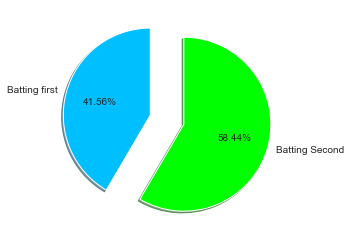

In [131]:
# Eden Gardens
Kolkata_stadium=match_data.loc[(match_data['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

* Batting Second on Eden Gardens is Clearly Favourable

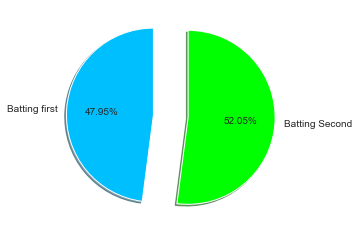

In [132]:
# Wankhede Stadium
Mumbai_stadium=match_data.loc[(match_data['venue']=='Wankhede Stadium') ]
Mumbai_stadium_win_by_runs=Mumbai_stadium[Mumbai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Mumbai_stadium_win_by_runs),len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.show()

* This shows it's almost equal if a Teams Bat's First or Bowl's First at Wankhede Stadium

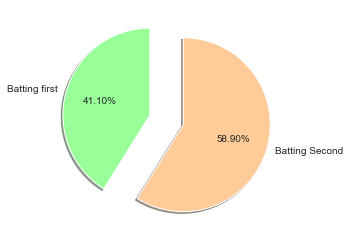

In [133]:
# M Chinnaswamy Stadium
M_Chinnaswamy_Stadium=match_data.loc[(match_data['venue']=='M Chinnaswamy Stadium') ]
M_Chinnaswamy_Stadium_win_by_runs=M_Chinnaswamy_Stadium[M_Chinnaswamy_Stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(M_Chinnaswamy_Stadium_win_by_runs),len(M_Chinnaswamy_Stadium)-len(M_Chinnaswamy_Stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

* Batting Second on M Chinnaswamy Stadium has Better win Percentage

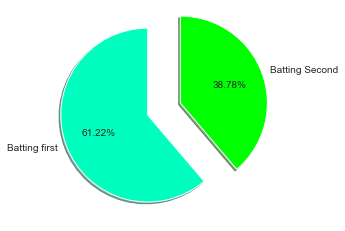

In [134]:
# MA Chidambaram Stadium, Chepauk
Chennai_stadium=match_data.loc[(match_data['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#00ffbf','#00ff00'])
plt.show()

* Batting Fisrt at MA Chidambaram Stadium, Chepauk is clearly a Good Option

In [135]:
# Analysis for year 2017

* Is Toss Winner Also the Match Winner? For the year 2017

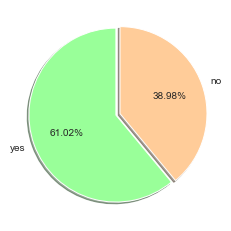

In [136]:
match_2019=match_data[match_data['season']==2019]
df=match_2019[match_2019['toss_winner']==match_2019['winner']]
slices=[len(df),(59-len(df))]# because Toal 59 matches were played in 2017
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

 * YES,In 2019 if a team won the toss they had slightly better chances to win the match

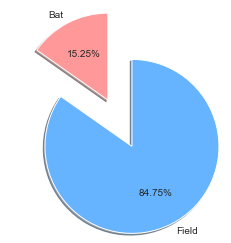

In [138]:
# Trends in 2019 after winning the toss.
dfs=match_data[(match_data['toss_decision']=='field') & (match_data['season']==2019) ]
labels=['Bat','Field']
slices=[59-len(dfs),len(dfs)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

* Teams winning toss in 2017 majorly decide to Field first.

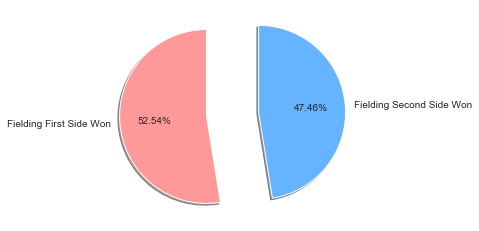

In [140]:
# **Crucial** observation
dfd=match_2019[(match_2019['toss_decision']=='field') & (match_2019['toss_winner']==match_2019['winner'])]
labels=['Fielding First Side Won','Fielding Second Side Won']
slices=[len(dfd),59-len(dfd)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

* Sides Fielding First Side Won More Matches in 2019

In [144]:
# Team1 vs Team 2 
def comparator(team1):
    teams=list(match_data.team1.unique())# you can take team2 here also 
    teams.remove(team1)
    opponents=teams.copy()
    mt1=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))# each time comparing each opponent team and the team we are looking for
#         print(mask)
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T# to_frame to convert to DataFrame and T is used to Transpose
        print(mt2)

In [147]:
comparator('Mumbai Indians')

        Sunrisers Hyderabad  Mumbai Indians
winner                    7               7
        Gujarat Lions  Mumbai Indians
winner              2               2
        Rising Pune Supergiant  Mumbai Indians
winner                       3               1
        Mumbai Indians  Royal Challengers Bangalore
winner              16                            9
        Mumbai Indians  Kolkata Knight Riders
winner              19                      6
        Mumbai Indians  Delhi Daredevils
winner              11                11
        Mumbai Indians  Kings XI Punjab
winner              13               11
        Mumbai Indians  Chennai Super Kings
winner              17                   11
        Rajasthan Royals  Mumbai Indians
winner                10              10
        Mumbai Indians  Deccan Chargers
winner               6                4
        Kochi Tuskers Kerala
winner                     1
        Mumbai Indians  Pune Warriors
winner               5              1


In [155]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [149]:
# MOST MAIDEN OVERS IN 2019
match_data.loc[match_data.season==2019].shape# this shows 60 matches were played in season 2017

most_maidens=delivery_data.groupby(['match_id','inning','over'])

# most_maidens.first()
list_of_most_maidens=[]
for match in range(1,60): # to iterate over each match total 59 matches
    for inning in range(1,3):# to iterate over each innings there are 2 innings in a match
        for over in range(1,21):# to iterate over maximum 20 overs in an innings
            
            try:# try block beacuse not every inning or every match is perfectly divided into 2 innings of 20 overs each in some matches due to rain or some other reason overswere reduced 
                #or even innings was dismissed
                if ((most_maidens.get_group((match,inning,over))['wide_runs'].sum()>0) + 
                    (most_maidens.get_group((match,inning,over))['noball_runs'].sum()>0)==most_maidens.get_group((match,inning,over))['total_runs'].sum()):
                    bowler=list(most_maidens.get_group((match,inning,over))['bowler'].unique())[0]
                    list_of_most_maidens.append(bowler)
                    
                    
                else:
                    pass
                
            except:
                continue


from statistics import mode 
def most_common(List): 
    return(mode(List)) 
    
print(str(most_common(list_of_most_maidens))+ " bowled most " + str(list_of_most_maidens.count(most_common(list_of_most_maidens))) + " maiden overs in 2019") 

JD Unadkat bowled most 3 maiden overs in 2019


* Task -5 Completed
* Thank you 